    station  year channel  n_events
0      MH36  2015     EHE      5013
1      MH36  2015     EHN      5019
2      MH36  2015     EHZ      5019
3      MH36  2016     EHE      8271
4      MH36  2016     EHN      8251
..      ...   ...     ...       ...
160    MH54  2024     EHN         0
161    MH54  2024     EHZ         0
162    MH54  2025     EHE         0
163    MH54  2025     EHN         0
164    MH54  2025     EHZ         0

[165 rows x 4 columns]


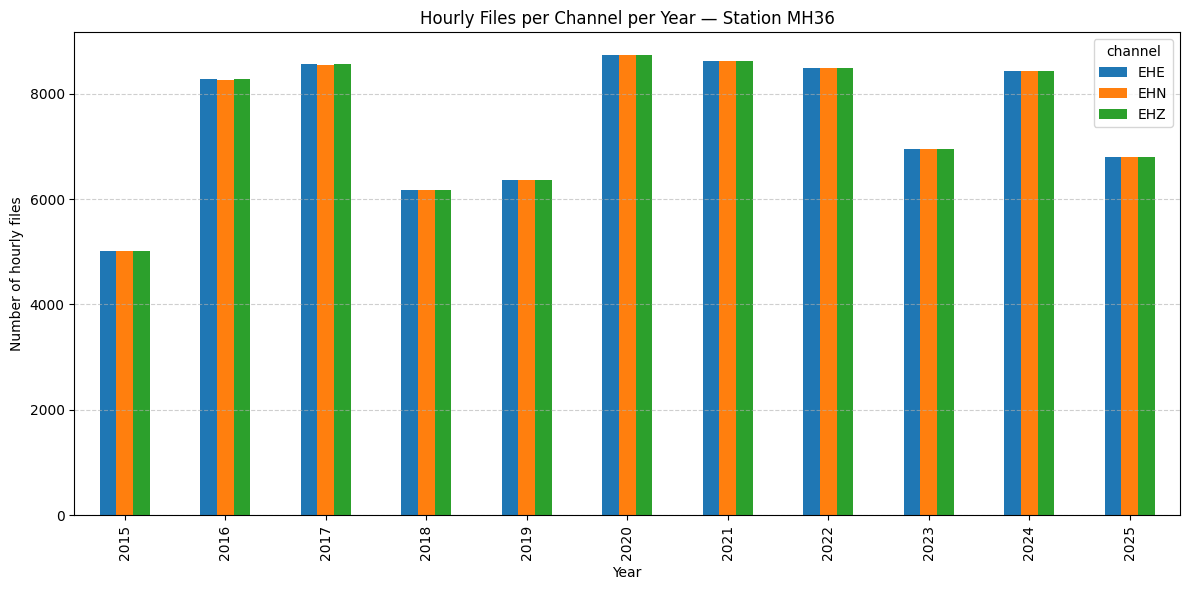

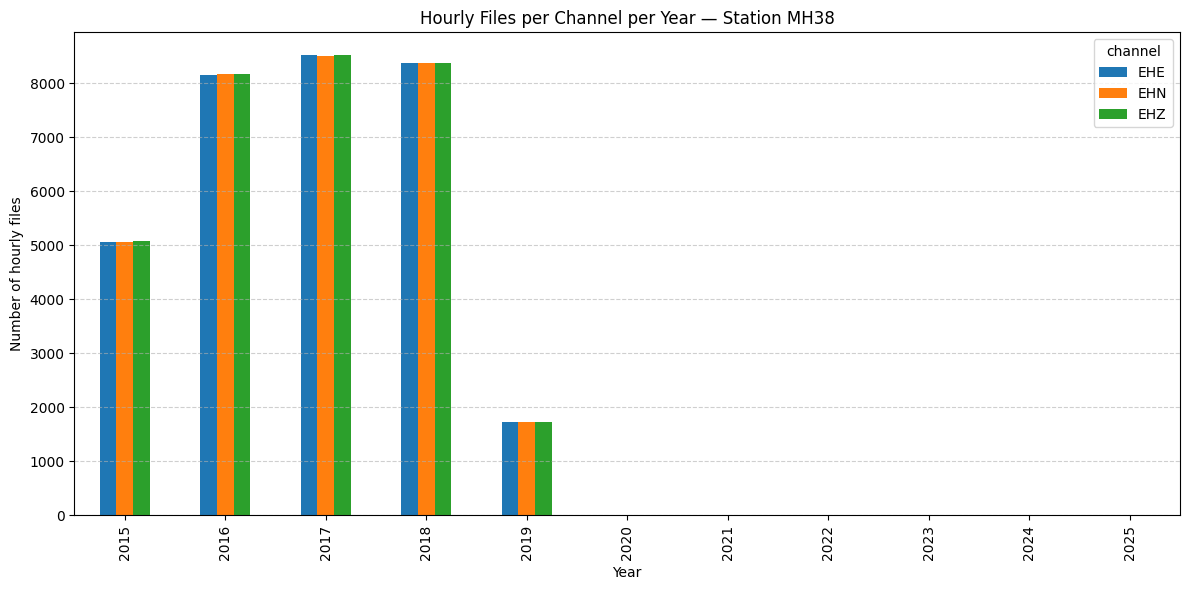

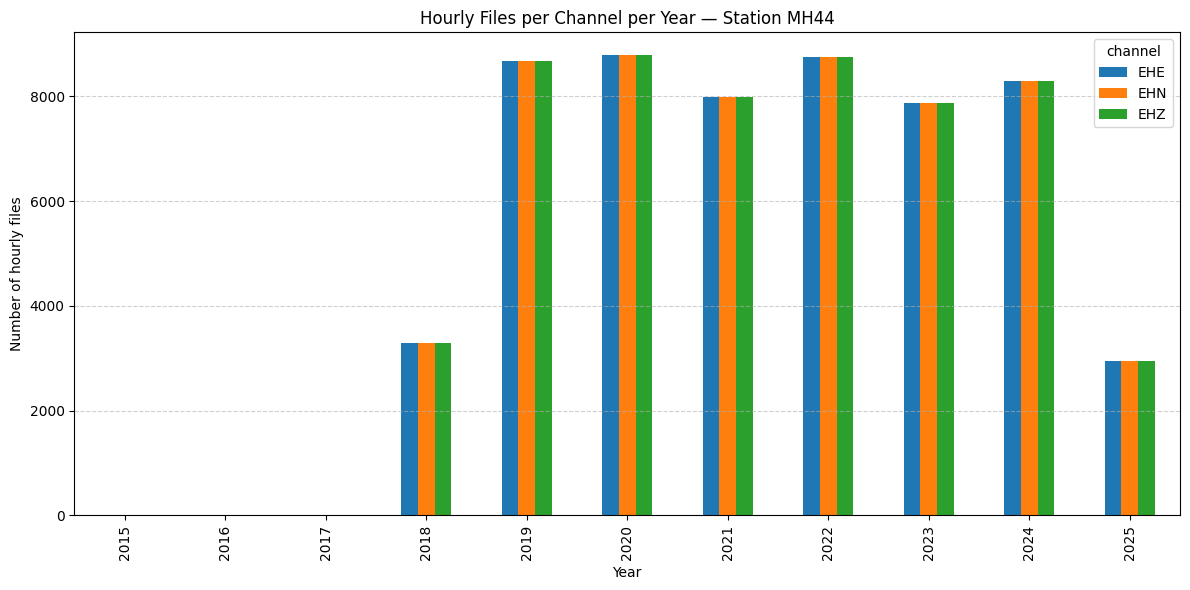

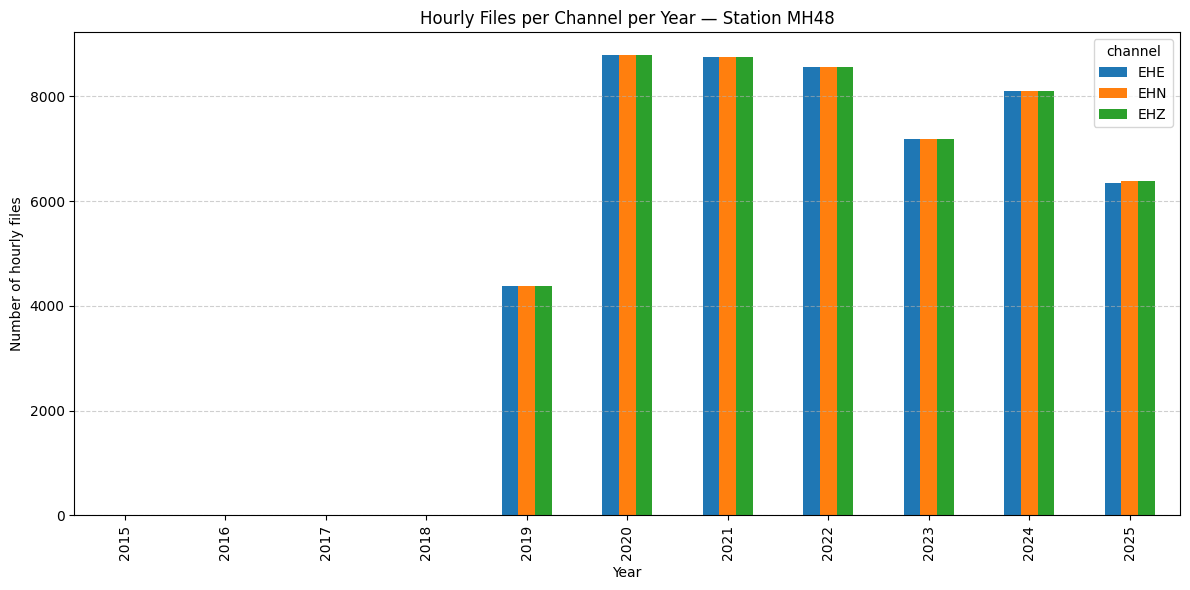

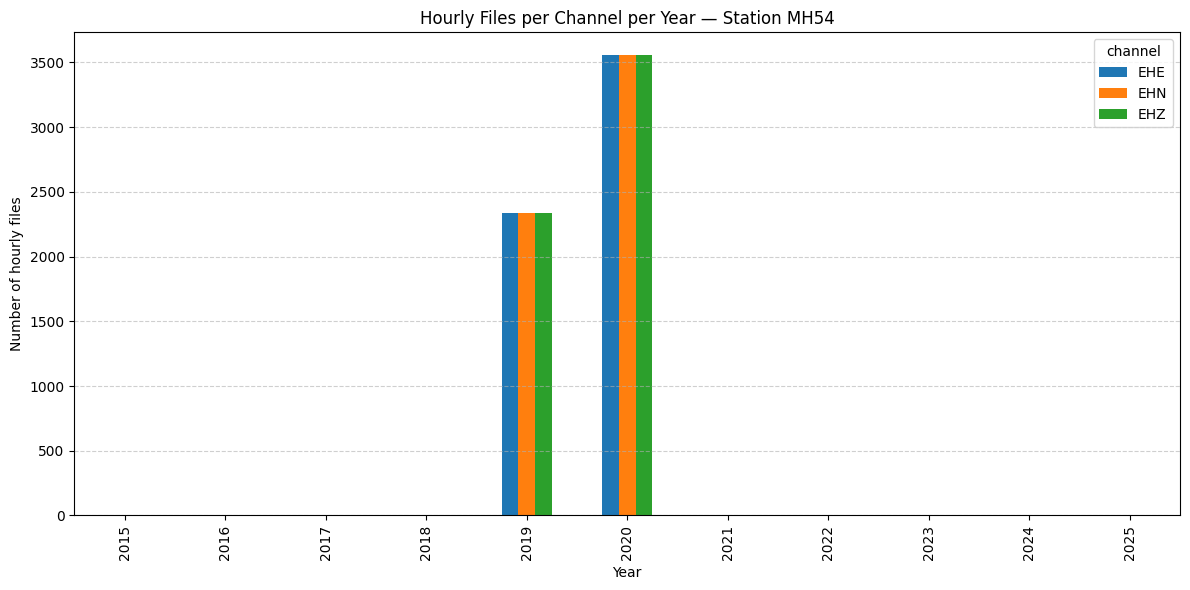

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def summarize_station_logs(stations, start_year, end_year):
    summary_records = []

    for station in stations:
        for year in range(start_year, end_year + 1):
            for channel in ["EHE", "EHN", "EHZ"]:
                path = f"../data/1I/{station}/{year}/{channel}.D_{year}.log"
                if os.path.exists(path):
                    df = pd.read_csv(path)
                    n_events = len(df)
                else:
                    n_events = 0
                
                summary_records.append({
                    "station": station,
                    "year": year,
                    "channel": channel,
                    "n_events": n_events
                })

    return pd.DataFrame(summary_records)


def plot_bar_summary(summary_df):
    # Group by station, year, and channel
    grouped = summary_df.groupby(["station", "year", "channel"])["n_events"].sum().reset_index()

    # Plot one bar plot per station
    for station in grouped["station"].unique():
        sub = grouped[grouped["station"] == station]
        pivoted = sub.pivot(index="year", columns="channel", values="n_events").fillna(0)

        pivoted.plot(
            kind="bar",
            figsize=(12, 6),
            stacked=False,
            title=f"Hourly Miniseed Files per Channel per Year — Station {station}"
        )
        plt.ylabel("Number of hourly files")
        plt.xlabel("Year")
        plt.grid(axis="y", linestyle="--", alpha=0.6)
        plt.tight_layout()
        plt.show()


# --- Example usage ---
stations = ["MH36", "MH38", "MH44", "MH48", "MH54"]
start_year = 2015
end_year = 2025

summary_df = summarize_station_logs(stations, start_year, end_year)
print(summary_df)

plot_bar_summary(summary_df)
